In [52]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Load the BTC price data
df = pd.read_csv("BTCUSDT_price_data_2024-01-24.csv")
df

,timestamp,mid_price,volume
0,1706054400000T,39881.95,439.561
1,1706054460000T,39926.55,776.492
2,1706054520000T,39877.05,339.306
3,1706054580000T,39927.45,246.511
4,1706054640000T,39926.55,423.920
...,...,...,...
1434,1706140440000T,40136.15,143.443
1435,1706140500000T,40098.15,186.484
1436,1706140560000T,40088.35,190.487
1437,1706140620000T,40063.55,110.088


In [55]:
# Clean timestamp
df['timestamp'] = df['timestamp'].astype(str).str.rstrip('T').astype('int64')
if df['timestamp'].max() > 1e12:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
else:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df = df.sort_values('timestamp').set_index('timestamp')

In [56]:
# 1. Compute 1 minute relative returns
df['return'] = df['mid_price'].pct_change()
df

,mid_price,volume,return
timestamp,,,
2024-01-24 00:00:00,39881.95,439.561,NaN
2024-01-24 00:01:00,39926.55,776.492,0.001118
2024-01-24 00:02:00,39877.05,339.306,-0.001240
2024-01-24 00:03:00,39927.45,246.511,0.001264
2024-01-24 00:04:00,39926.55,423.920,-0.000023
...,...,...,...
2024-01-24 23:54:00,40136.15,143.443,0.000601
2024-01-24 23:55:00,40098.15,186.484,-0.000947
2024-01-24 23:56:00,40088.35,190.487,-0.000244


In [57]:
# 2.Compute a 10-period simple moving average (SMA) of the price
sma_period = 10
df['sma'] = df['mid_price'].rolling(window=sma_period).mean()
df.head(20)

,mid_price,volume,return,sma
timestamp,,,,
2024-01-24 00:00:00,39881.95,439.561,NaN,NaN
2024-01-24 00:01:00,39926.55,776.492,0.001118,NaN
2024-01-24 00:02:00,39877.05,339.306,-0.001240,NaN
2024-01-24 00:03:00,39927.45,246.511,0.001264,NaN
2024-01-24 00:04:00,39926.55,423.920,-0.000023,NaN
2024-01-24 00:05:00,39911.15,241.680,-0.000386,NaN
2024-01-24 00:06:00,39945.15,333.421,0.000852,NaN
2024-01-24 00:07:00,39938.65,198.849,-0.000163,NaN
2024-01-24 00:08:00,39940.25,169.794,0.000040,NaN


In [58]:
# 3.Define trading signals
df['price_minus_sma'] = df['mid_price'] - df['sma']
df['price_minus_sma_prev'] = df['price_minus_sma'].shift(1)

df['buy_signal'] = (df['price_minus_sma_prev'] <= 0) & (df['price_minus_sma'] > 0)
df['sell_signal'] = (df['price_minus_sma_prev'] >= 0) & (df['price_minus_sma'] < 0)
df.head(20)

,mid_price,volume,return,sma,price_minus_sma,price_minus_sma_prev,buy_signal,sell_signal
timestamp,,,,,,,,
2024-01-24 00:00:00,39881.95,439.561,NaN,NaN,NaN,NaN,False,False
2024-01-24 00:01:00,39926.55,776.492,0.001118,NaN,NaN,NaN,False,False
2024-01-24 00:02:00,39877.05,339.306,-0.001240,NaN,NaN,NaN,False,False
2024-01-24 00:03:00,39927.45,246.511,0.001264,NaN,NaN,NaN,False,False
2024-01-24 00:04:00,39926.55,423.920,-0.000023,NaN,NaN,NaN,False,False
2024-01-24 00:05:00,39911.15,241.680,-0.000386,NaN,NaN,NaN,False,False
2024-01-24 00:06:00,39945.15,333.421,0.000852,NaN,NaN,NaN,False,False
2024-01-24 00:07:00,39938.65,198.849,-0.000163,NaN,NaN,NaN,False,False
2024-01-24 00:08:00,39940.25,169.794,0.000040,NaN,NaN,NaN,False,False


In [59]:
# 4. Backtest the strategy under these conditions:
# ------------------------------------------------
# - Start with $100,000 in initial capital.
# - Trade only one position at a time:
#     * Buy signal： go fully long (100% of capital invested in BTC).
#     * Sell signal： go fully short (borrow BTC and short with full capital).
#     * Switch sides only when the opposite signal appears.
# - No leverage or partial positions allowed.
# - No transaction fees are included for now.

initial_capital = 100000.0
capital = initial_capital
position = 0  # 1 = long, -1 = short, 0 = flat
entry_price = None

equity_curve = []
trades = []

for time, row in df.iterrows():
    price = row['mid_price']

    # Mark-to-market PnL update
    if position != 0 and entry_price is not None:
        if position == 1:
            current_equity = initial_capital + (price - entry_price) / entry_price * initial_capital
        elif position == -1:
            current_equity = initial_capital + (entry_price - price) / entry_price * initial_capital
    else:
        current_equity = initial_capital
    equity_curve.append(current_equity)

    # Signal handling
    if row['buy_signal'] and position != 1:
        entry_price = price
        position = 1
        trades.append({'time': time, 'type': 'buy', 'price': price})
    elif row['sell_signal'] and position != -1:
        entry_price = price
        position = -1
        trades.append({'time': time, 'type': 'sell', 'price': price})

In [60]:
# 5. Track and output performance metrics:
# ------------------------------------------------
# - Calculate total return (%) over the backtest period
# - Count the total number of executed trades
# - Compute maximum drawdown (peak-to-trough decline)
# - Compute Sharpe ratio (optional, for risk-adjusted return)

df['equity'] = equity_curve
df['returns_equity'] = df['equity'].pct_change().fillna(0)

# Total return (%)
total_return = (df['equity'].iloc[-1] - initial_capital) / initial_capital * 100

# Number of trades
num_trades = len(trades)

# Maximum drawdown (%)
running_max = df['equity'].cummax()
drawdown = (df['equity'] - running_max) / running_max
max_drawdown = drawdown.min() * 100

# Sharpe ratio (optional)
sharpe = np.sqrt(252*24*60) * df['returns_equity'].mean() / df['returns_equity'].std()

# Print performance metrics
print(f"Total return: {total_return:.2f}%")
print(f"Number of trades: {num_trades}")
print(f"Maximum drawdown: {max_drawdown:.2f}%")
print(f"Sharpe ratio: {sharpe:.2f}")

Total return: 0.14%
Number of trades: 224
Maximum drawdown: -1.48%
Sharpe ratio: 0.93


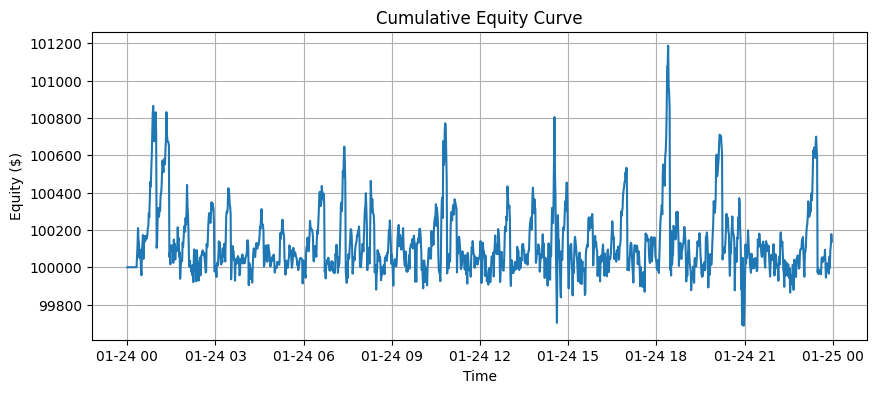

In [61]:
# 6.Plot a cumulative PnL (equity) curve over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df['equity'])
plt.title('Cumulative Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity ($)')
plt.grid(True)
plt.show()

In [62]:
# 7.Add realistic transaction cost (e.g., 0.02% per trade) and re-evaluate result
# Write a function for backtesting, where we could adjust transaction fee and sma period
def backtest_single_sma(df, sma_period=10, initial_capital=100000.0, fee=0.0002):
    """
    Backtest single SMA strategy with transaction fees.
    Price crossing SMA generates buy/sell signals.
    
    Parameters:
    - df: DataFrame with 'mid_price'
    - sma_period: period for SMA
    - initial_capital: starting capital
    - fee: per-trade cost (fraction)
    
    Returns:
    - df: DataFrame with signal and equity columns added
    - trades: list of executed trades
    - performance: dict with metrics
    """
    df = df.copy()
    sma_col = f'SMA_{sma_period}'
    buy_col = f'buy_signal_{sma_period}'
    sell_col = f'sell_signal_{sma_period}'
    equity_col = f'equity_{sma_period}'
    
    # Calculate SMA
    df[sma_col] = df['mid_price'].rolling(sma_period).mean()
    
    # Generate signals: price crossing SMA
    df[buy_col] = (df['mid_price'] > df[sma_col]) & (df['mid_price'].shift(1) <= df[sma_col].shift(1))
    df[sell_col] = (df['mid_price'] < df[sma_col]) & (df['mid_price'].shift(1) >= df[sma_col].shift(1))
    
    # Backtest
    position = 0
    entry_price = None
    equity_curve = []
    trades = []
    capital = initial_capital
    
    for time, row in df.iterrows():
        price = row['mid_price']
        
        # Mark-to-market
        if position != 0 and entry_price is not None:
            if position == 1:
                current_equity = capital + (price - entry_price) / entry_price * capital
            elif position == -1:
                current_equity = capital + (entry_price - price) / entry_price * capital
        else:
            current_equity = capital
        equity_curve.append(current_equity)
        
        # Signal handling
        if row[buy_col] and position != 1:
            if position != 0:
                capital = current_equity * (1 - fee)
            entry_price = price
            position = 1
            trades.append({'time': time, 'type': 'buy', 'price': price})
        elif row[sell_col] and position != -1:
            if position != 0:
                capital = current_equity * (1 - fee)
            entry_price = price
            position = -1
            trades.append({'time': time, 'type': 'sell', 'price': price})
    
    df[equity_col] = equity_curve
    df[f'returns_{sma_period}'] = df[equity_col].pct_change().fillna(0)
    
    # Performance metrics
    total_return = (df[equity_col].iloc[-1] - initial_capital) / initial_capital * 100
    num_trades = len(trades)
    running_max = df[equity_col].cummax()
    drawdown = (df[equity_col] - running_max) / running_max
    max_drawdown = drawdown.min() * 100
    sharpe = np.sqrt(252*24*60) * df[f'returns_{sma_period}'].mean() / df[f'returns_{sma_period}'].std()
    
    performance = {
        'SMA_period': sma_period,
        'total_return': total_return,
        'num_trades': num_trades,
        'max_drawdown': max_drawdown,
        'sharpe': sharpe
    }
    
    return df, trades, performance


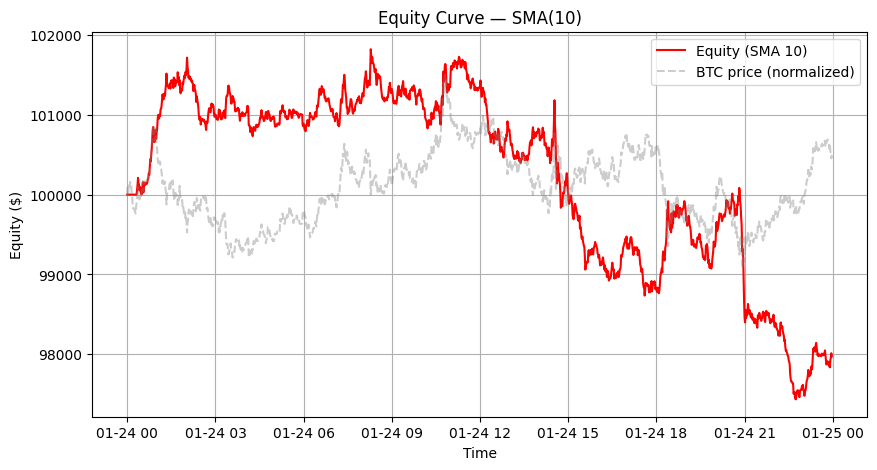

Performance Summary — SMA(10):
Total return:   -2.03%
Number of trades: 224
Max drawdown:   -4.30%
Sharpe ratio:   -13.68


In [69]:
# Run single SMA(10) backtest
df_bt, trades_10, perf_10 = backtest_single_sma(df, sma_period=10, initial_capital=100000, fee=0.0002)

# Plot equity curve for SMA(10)
plt.figure(figsize=(10, 5))
plt.plot(df_bt.index, df_bt['equity_10'], label='Equity (SMA 10)', color='red')
plt.plot(df_bt.index, df_bt['mid_price'] / df_bt['mid_price'].iloc[0] * 100000, 
         label='BTC price (normalized)', color='gray', alpha=0.4, linestyle='--')
plt.title('Equity Curve — SMA(10)')
plt.xlabel('Time')
plt.ylabel('Equity ($)')
plt.legend()
plt.grid(True)
plt.show()

# Pretty print performance metrics
print(f"Performance Summary — SMA({perf_10['SMA_period']}):")
print(f"Total return:   {perf_10['total_return']:.2f}%")
print(f"Number of trades: {perf_10['num_trades']}")
print(f"Max drawdown:   {perf_10['max_drawdown']:.2f}%")
print(f"Sharpe ratio:   {perf_10['sharpe']:.2f}")


In [70]:
# Save results to csv
summary_df = pd.DataFrame([perf_10]) 
summary_df.to_csv("backtest_summary_sma10.csv", index=False)
df_bt[['mid_price', 'equity_10']].to_csv("equity_curve_sma10.csv")
trades_df = pd.DataFrame(trades_10)
trades_df.to_csv("trade_log_sma10.csv", index=False)

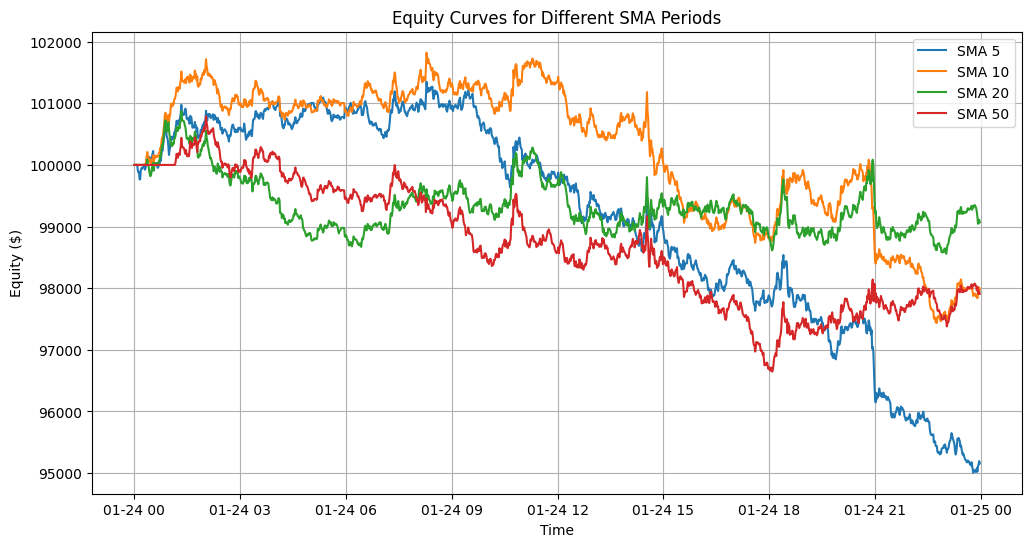

   SMA_period  total_return  num_trades  max_drawdown     sharpe
2          20     -0.928457         142     -2.295949  -6.144660
1          10     -2.025091         224     -4.304416 -13.678273
3          50     -2.090799         107     -4.112514 -14.524032
0           5     -4.843793         359     -6.259836 -33.166201


In [73]:
# 8. run multiple back-tests with different SMA periods and compare performance metrics
sma_periods = [5, 10, 20, 50]
performance_list = []

plt.figure(figsize=(12,6))

for period in sma_periods:
    df_bt, trades, perf = backtest_single_sma(df, sma_period=period)
    performance_list.append(perf)
    
    equity_col = f'equity_{period}'
    plt.plot(df_bt.index, df_bt[equity_col], label=f'SMA {period}')

plt.title('Equity Curves for Different SMA Periods')
plt.xlabel('Time')
plt.ylabel('Equity ($)')
plt.grid(True)
plt.legend()
plt.show()

performance_df = pd.DataFrame(performance_list)
print(performance_df.sort_values('total_return', ascending=False))
# Save to CSV
performance_df.to_csv("performance_summary_different_sma.csv", index=False)

# Implementation summary

In the implementation, when real transaction fees are included, all strategies are negative, meaning the SMA strategy lost money in this market period.
Short-period SMA reacts quickly but produces many false signals. Long-period SMA reacts slowly but generates more stable signals.

We could improve the performance by implementing the following strategies: add signal filtering to reduce false trades; introduce stop-loss / take-profit rules to limit drawdowns and lock in gains; consider dual SMA crossover strategy for smoother, more reliable signals.

In [74]:
# Python script to generate README.md

readme_content = """
# Single SMA Backtesting Strategy

This project implements a **single SMA trading strategy** for cryptocurrencies in a Jupyter Notebook. Buy/sell signals are generated when the price crosses above/below the SMA. The backtest simulates full-position long/short trades with optional transaction fees.

**Requirements:**  
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Features:

Test multiple SMA periods and compare performance.

Track total return, number of trades, max drawdown, and Sharpe ratio.

Output equity curves, trade logs, and a performance summary CSV.

Insights:

SMA(20) performed best in this dataset (lowest loss, moderate drawdown).

Short-period SMAs are sensitive to noise and lead to frequent losing trades.

Improvements:

Add signal filtering, stop-loss/take-profit rules, or dual SMA crossover.

Test across different market conditions to optimize SMA selection.

Usage Example:

python
Copy code
df_bt, trades, perf = backtest_single_sma(df, sma_period=10, initial_capital=100000, fee=0.0002)
"""

In [76]:
with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_content)

print("✅ README.md generated successfully!")

✅ README.md generated successfully!
